# AgAb EDA


In [2]:
import pandas as pd
import glob
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_asd_data_with_pandas(data_path: str = "/content/drive/MyDrive/Antibody_Chekalin_Denis/asd") -> pd.DataFrame:
    """
    Загружает все parquet файлы из папки asd в один pandas DataFrame

    Args:
        data_path: путь к папке с данными

    Returns:
        pd.DataFrame: объединенный DataFrame со всеми данными
    """
    # Получаем все parquet файлы из папки
    parquet_files = glob.glob(os.path.join(data_path, "part-*.parquet"))

    if not parquet_files:
        raise ValueError(f"Не найдено parquet файлов в папке {data_path}")

    print(f"Найдено {len(parquet_files)} parquet файлов")

    # Загружаем все файлы в список DataFrame'ов
    dataframes = []
    for file_path in parquet_files:
        # print(f"Загружаем файл: {os.path.basename(file_path)}")
        df = pd.read_parquet(file_path)
        dataframes.append(df)

    # Объединяем все DataFrame'ы в один
    combined_df = pd.concat(dataframes, ignore_index=True)

    print(f"Общий размер данных: {combined_df.shape}")
    print(f"Колонки: {list(combined_df.columns)}")

    return combined_df

# Загружаем данные
agab_df = load_asd_data_with_pandas('./asd')

Найдено 20 parquet файлов
Общий размер данных: (1227083, 11)
Колонки: ['dataset', 'heavy_sequence', 'light_sequence', 'scfv', 'affinity_type', 'affinity', 'antigen_sequence', 'confidence', 'nanobody', 'metadata', 'processed_measurement']


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
agab_df.sample(5)

,dataset,heavy_sequence,light_sequence,scfv,affinity_type,affinity,antigen_sequence,confidence,nanobody,metadata,processed_measurement
188688,buzz,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,fuzzy,h,TQVCTGTDMKLRLPASPETHLDMLRHLYQGCQVVQGNLELTYLPTN...,very_high,False,"{'target_name': 'human her2', 'target_pdb': '1...",h
868366,buzz,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,fuzzy,l,TQVCTGTDMKLRLPASPETHLDMLRHLYQGCQVVQGNLELTYLPTN...,very_high,False,"{'target_name': 'human her2', 'target_pdb': '1...",l
246585,buzz,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,fuzzy,l,TQVCTGTDMKLRLPASPETHLDMLRHLYQGCQVVQGNLELTYLPTN...,very_high,False,"{'target_name': 'human her2', 'target_pdb': '1...",l
731850,covid-19,QVQLVESGGGVVQPGRSLRLSCAASGFTFSSHGIHWVRQAPGKGLE...,,False,bool,1.0,RVQPTESIVRFPNITNLCPFDEVFNATRFASVYAWNRKRISNCVAD...,very_high,False,"{'target_name': 'sars-cov2_omicron', 'target_p...",1.0
1175900,buzz,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,fuzzy,h,TQVCTGTDMKLRLPASPETHLDMLRHLYQGCQVVQGNLELTYLPTN...,very_high,False,"{'target_name': 'human her2', 'target_pdb': '1...",h


In [4]:
agab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227083 entries, 0 to 1227082
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   dataset                1227083 non-null  object
 1   heavy_sequence         1147978 non-null  object
 2   light_sequence         1105242 non-null  object
 3   scfv                   1227083 non-null  bool  
 4   affinity_type          1227083 non-null  object
 5   affinity               1227083 non-null  object
 6   antigen_sequence       1227083 non-null  object
 7   confidence             1227083 non-null  object
 8   nanobody               1223458 non-null  object
 9   metadata               1227083 non-null  object
 10  processed_measurement  1227083 non-null  object
dtypes: bool(1), object(10)
memory usage: 94.8+ MB


#### dataset

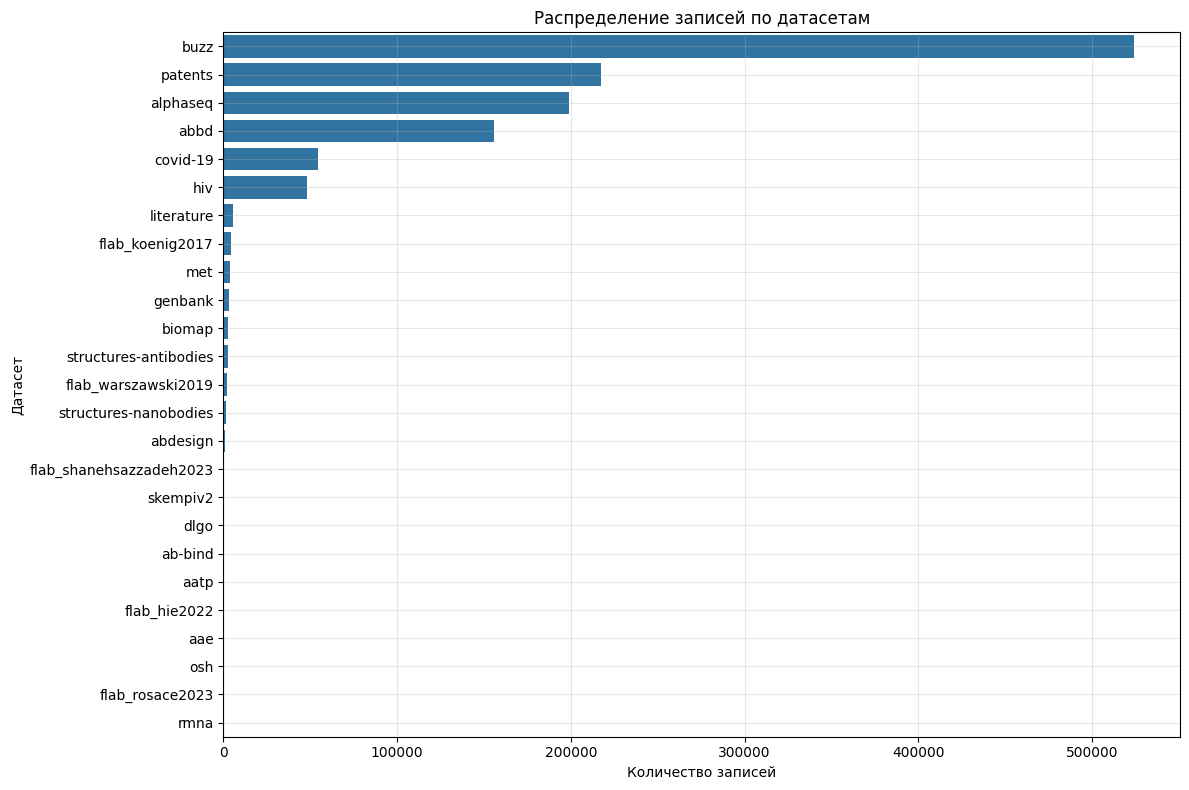

In [5]:
# Get the value counts for the 'dataset' column
dataset_counts = agab_df['dataset'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 8)) # Increased figure height for better readability
sns.barplot(x=dataset_counts.values, y=dataset_counts.index) # Swapped x and y
plt.grid(True, alpha=0.3)
plt.xlabel("Количество записей") # Swapped labels
plt.ylabel("Датасет") # Swapped labels
plt.title("Распределение записей по датасетам")
plt.tight_layout()
plt.show()

In [6]:
print("=== СРАВНЕНИЕ КОЛИЧЕСТВА ЗАПИСЕЙ ПО ДАТАСЕТАМ ===\n")

# Данные с сайта https://naturalantibody.com/agab/ (из таблицы)
website_datasets = {
    'aae': 35,
    'aatp': 93,
    'ab-bind': 283,
    'abbd': 155853,
    'abdesign': 672,
    'alphaseq': 198703,
    'biomap': 2725,
    'buzz': 524346,
    'covid-19': 27301,
    'dlgo': 360,
    'flab_hie2022': 55,
    'flab_koenig2017': 4275,
    'flab_rosace2023': 25,
    'flab_shanehsazzadeh2023': 446,
    'flab_warszawski2019': 2048,
    'genbank': 2984,
    'hiv': 48008,
    'literature': 5580,
    'met': 4000,
    'osh': 30,
    'patents': 217463,
    'rmna': 10,
    'skempiv2': 434,
    'structures-antibodies': 2711,
    'structures-nanobodies': 1258
}

actual_counts = agab_df['dataset'].value_counts().to_dict()
all_datasets = sorted(set(website_datasets.keys()) | set(actual_counts.keys()))

comparison_df = pd.DataFrame([{
    'dataset': ds,
    'website_count': website_datasets.get(ds, 0),
    'actual_count': actual_counts.get(ds, 0),
    'difference': actual_counts.get(ds, 0) - website_datasets.get(ds, 0),
    'difference_pct': f"{(actual_counts.get(ds, 0) - website_datasets.get(ds, 0)) / website_datasets[ds] * 100:.2f}%" 
                     if website_datasets.get(ds, 0) > 0 else "N/A"
} for ds in all_datasets]).sort_values('actual_count', ascending=False)

print("Сравнение количества записей:")
print(comparison_df.to_string(index=False))

website_total = sum(website_datasets.values())
print(f"\n{'='*80}")
print(f"ИТОГО по сайту: {website_total:,}")
print(f"ИТОГО фактически в данных: {len(agab_df):,}")
print(f"РАЗНИЦА: {len(agab_df) - website_total:,}")
print(f"{'='*80}")


=== СРАВНЕНИЕ КОЛИЧЕСТВА ЗАПИСЕЙ ПО ДАТАСЕТАМ ===

Сравнение количества записей:
                dataset  website_count  actual_count  difference difference_pct
                   buzz         524346        524346           0          0.00%
                patents         217463        217463           0          0.00%
               alphaseq         198703        198703           0          0.00%
                   abbd         155853        155853           0          0.00%
               covid-19          27301         54625       27324        100.08%
                    hiv          48008         48008           0          0.00%
             literature           5580          5636          56          1.00%
        flab_koenig2017           4275          4275           0          0.00%
                    met           4000          4000           0          0.00%
                genbank           2984          2989           5          0.17%
                 biomap           2725 

#### VH/VL length distribution

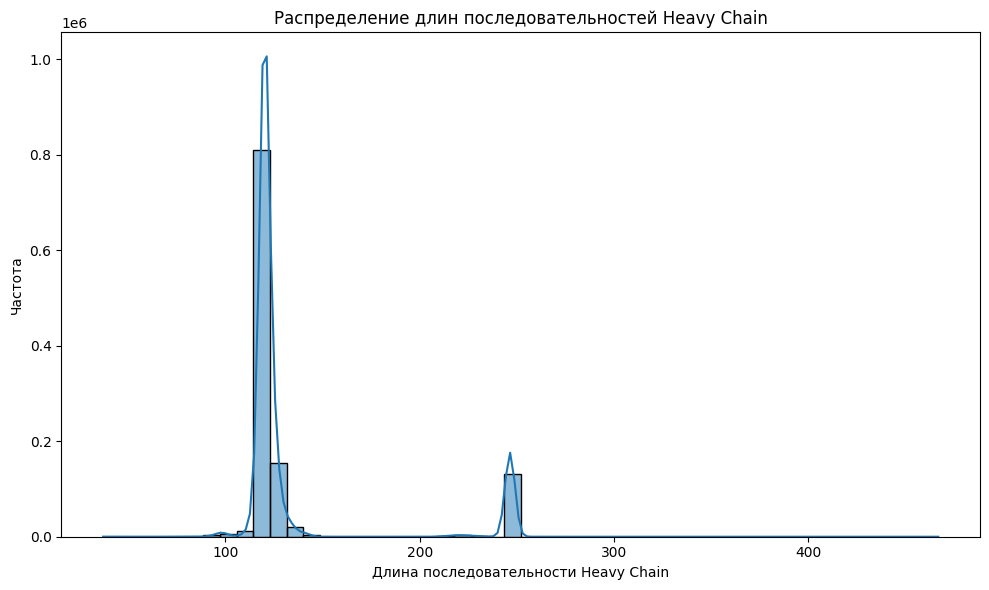

In [6]:
# Calculate the length of heavy_sequence, handling missing values
heavy_sequence_lengths = agab_df['heavy_sequence'].dropna().apply(len)

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(heavy_sequence_lengths, bins=50, kde=True)
plt.xlabel("Длина последовательности Heavy Chain")
plt.ylabel("Частота")
plt.title("Распределение длин последовательностей Heavy Chain")
plt.tight_layout()
plt.show()

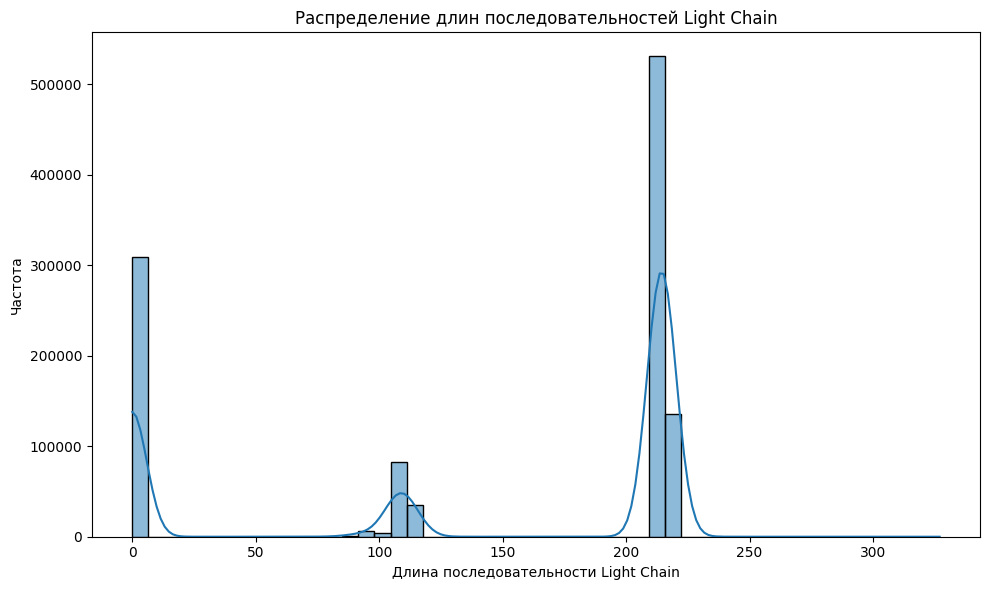

In [7]:
# Calculate the length of light_sequence, handling missing values
light_sequence_lengths = agab_df['light_sequence'].dropna().apply(len)

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(light_sequence_lengths, bins=50, kde=True)
plt.xlabel("Длина последовательности Light Chain")
plt.ylabel("Частота")
plt.title("Распределение длин последовательностей Light Chain")
plt.tight_layout()
plt.show()

#### Paired VH/VL lenghts

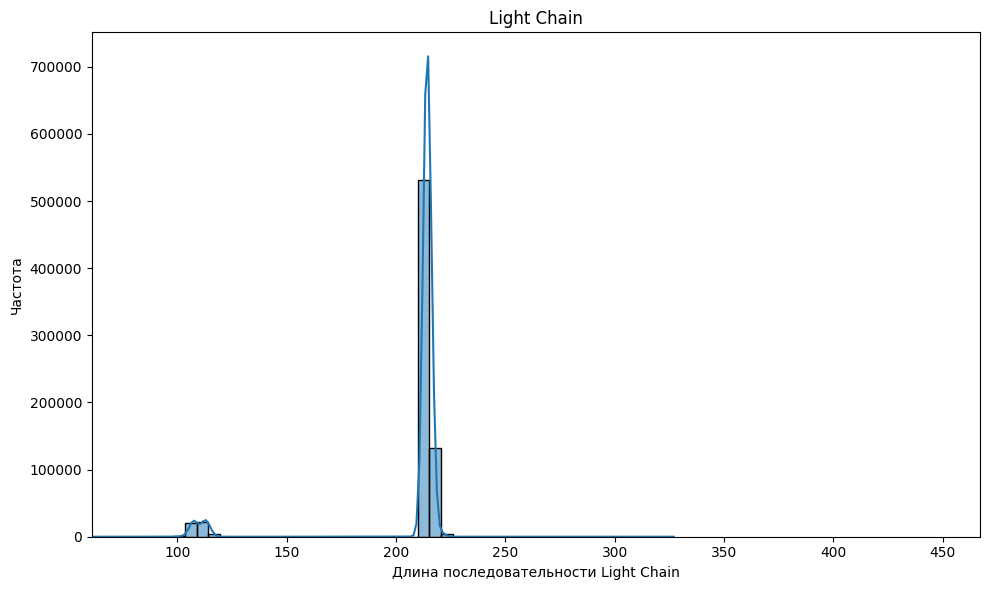

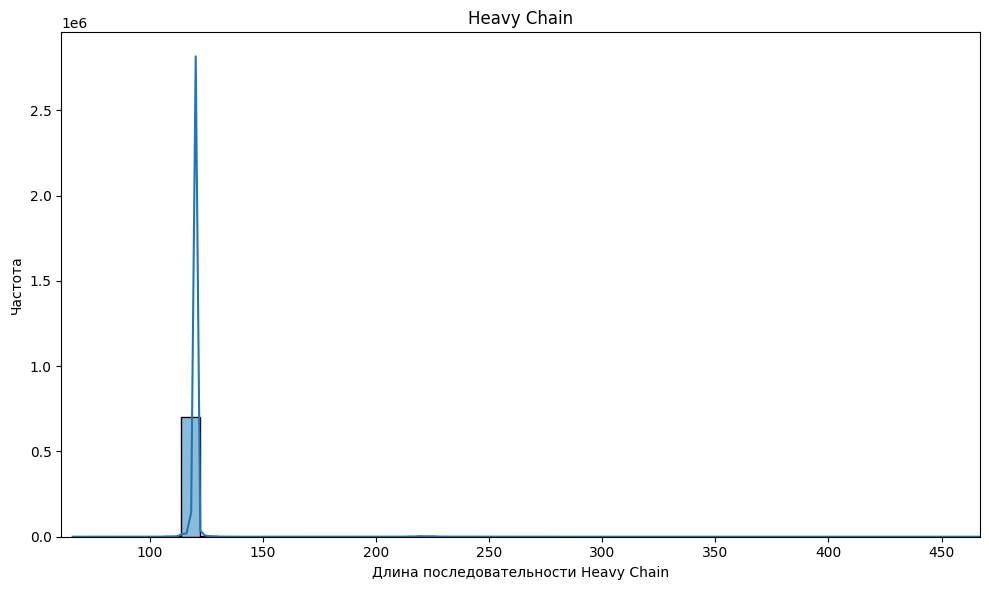

In [11]:
filtered = agab_df[
    agab_df['light_sequence'].notna()
    & agab_df['heavy_sequence'].notna()
    & (agab_df['light_sequence'].str.len() > 10)
    & (agab_df['nanobody'] == False)
    & (agab_df['scfv'] == False)
]

# Calculate lengths for both heavy and light chains
light_lengths = filtered['light_sequence'].str.len()
heavy_lengths = filtered['heavy_sequence'].str.len()

# Determine common x-axis limits
min_len = min(light_lengths.min(), heavy_lengths.min())
max_len = max(light_lengths.max(), heavy_lengths.max())


plt.figure(figsize=(10, 6))
sns.histplot(light_lengths, bins=50, kde=True)
plt.title("Light Chain")
plt.xlabel("Длина последовательности Light Chain")
plt.ylabel("Частота")
plt.xlim(min_len, max_len) # Apply common x-axis limit
plt.tight_layout()


plt.figure(figsize=(10, 6))
sns.histplot(heavy_lengths, bins=50, kde=True)
plt.title("Heavy Chain")
plt.xlabel("Длина последовательности Heavy Chain")
plt.ylabel("Частота")
plt.xlim(min_len, max_len) # Apply common x-axis limit
plt.tight_layout()
plt.show()

Средняя длина VH/VL  
VH: ~110–115 а.о.  
VL: ~110–115 а.о.

Количество записей с длиной Light Chain > 200: 666638


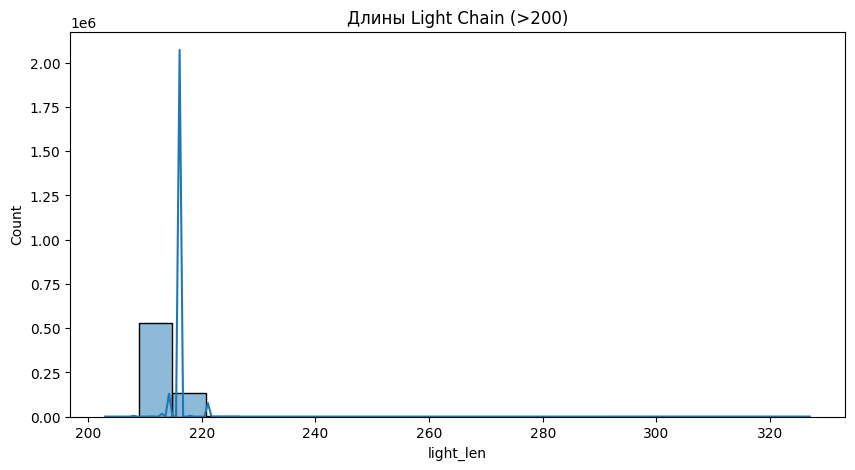

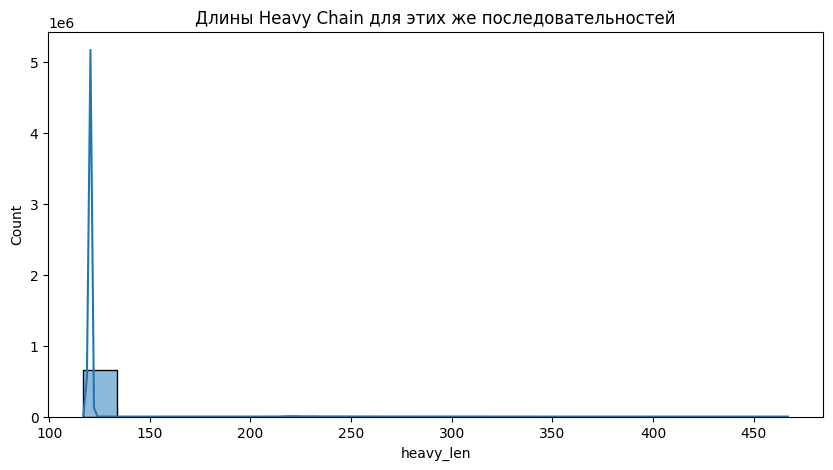

,heavy_len,light_len,heavy_sequence,light_sequence,scfv,nanobody
464630,121,216,QVQLVQSGAEVKKPGSSVKVSCKASGGTFNSYAISWVRQAPGQGLE...,QSALTQPPAVSGTPGQRVTISCSGSDSNIGRRSVNWYQQFPGTAPK...,False,False
80122,120,214,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,False
815127,120,214,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,False
17938,120,214,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,False
262458,120,214,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,False


In [ ]:
# Фильтрация: подозрительно длинные light chain
long_light = agab_df[
    agab_df['light_sequence'].notna() &
    (agab_df['light_sequence'].str.len() > 200)
]

print("Количество записей с длиной Light Chain > 200:", len(long_light))

# Добавляем длины для анализа
long_light = long_light.assign(
    light_len=long_light['light_sequence'].str.len(),
    heavy_len=long_light['heavy_sequence'].str.len()
)

# Гистограммы длин
plt.figure(figsize=(10, 5))
sns.histplot(long_light['light_len'], kde=True)
plt.title("Длины Light Chain (>200)")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(long_light['heavy_len'], kde=True)
plt.title("Длины Heavy Chain для этих же последовательностей")
plt.show()

# Показываем примерные строки
cols = ["heavy_len", "light_len", "heavy_sequence", "light_sequence", "scfv", "nanobody"]
display(long_light[cols].sample(5))


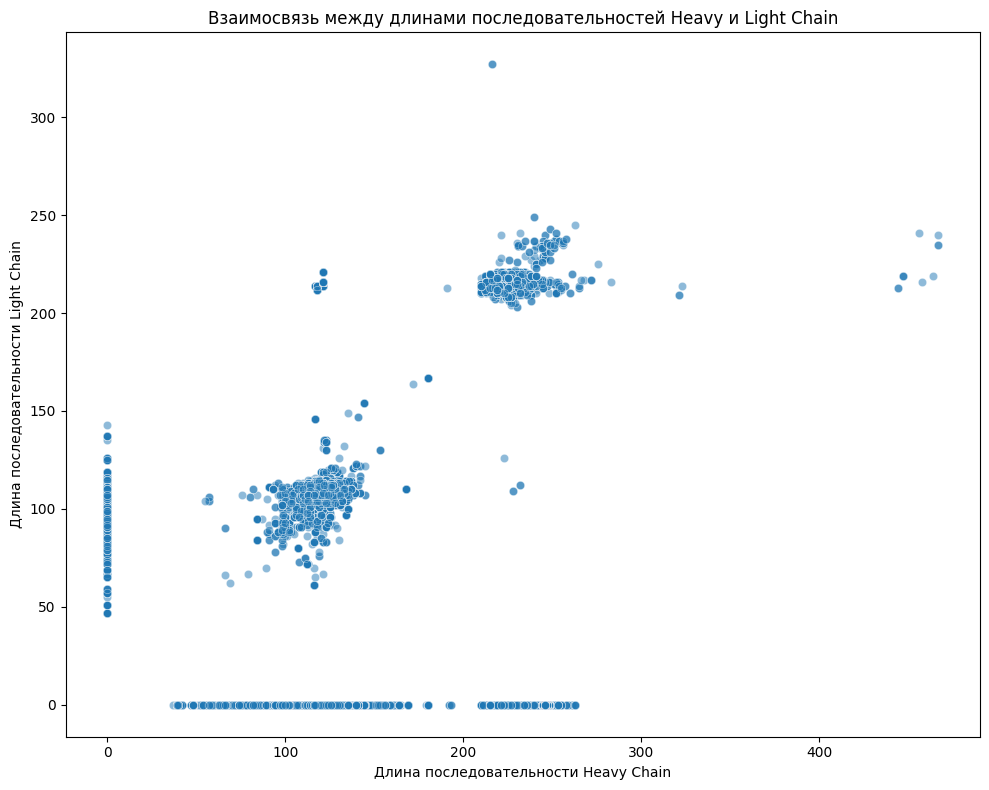

In [ ]:
# Calculate lengths, handling missing values by filling with 0 (or another appropriate value)
agab_df['heavy_sequence_length'] = agab_df['heavy_sequence'].apply(lambda x: len(x) if pd.notna(x) else 0)
agab_df['light_sequence_length'] = agab_df['light_sequence'].apply(lambda x: len(x) if pd.notna(x) else 0)

# Filter out rows where both lengths are 0 (assuming this represents no sequence)
plot_df = agab_df[(agab_df['heavy_sequence_length'] > 0) | (agab_df['light_sequence_length'] > 0)]

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=plot_df, x='heavy_sequence_length', y='light_sequence_length', alpha=0.5)
plt.xlabel("Длина последовательности Heavy Chain")
plt.ylabel("Длина последовательности Light Chain")
plt.title("Взаимосвязь между длинами последовательностей Heavy и Light Chain")
plt.tight_layout()
plt.show()

Число парных последовательностей

In [ ]:
paired = agab_df[
    agab_df["heavy_sequence"].notna()
    & agab_df["light_sequence"].notna()
    & (agab_df["heavy_sequence"] != "")
    & (agab_df["light_sequence"] != "")
]

# Число парных записей
print("Всего с heavy и light:", len(paired))

# Сколько среди них scFv?
print("Из них scFv:", paired["scfv"].sum())

Всего с heavy и light: 716650
Из них scFv: 474


#### scFv

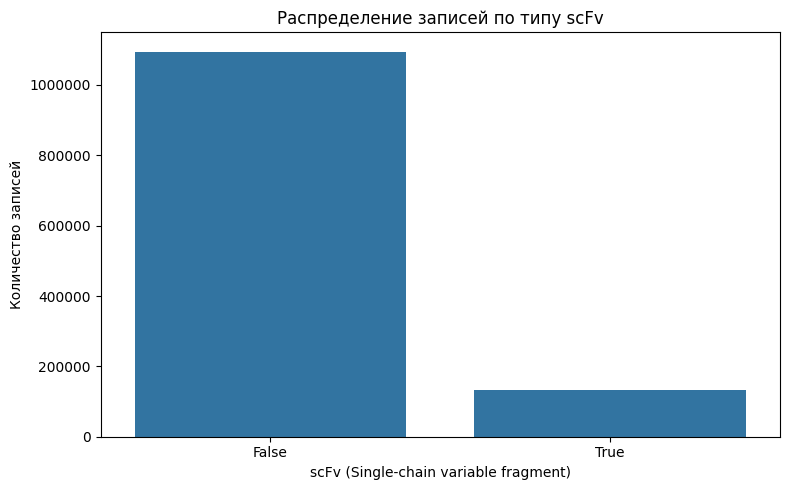

In [ ]:
# Get the value counts for the 'scfv' column
scfv_counts = agab_df['scfv'].value_counts().reset_index()
scfv_counts.columns = ['scfv', 'count']

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='scfv', y='count', data=scfv_counts)
plt.xlabel("scFv (Single-chain variable fragment)")
plt.ylabel("Количество записей")
plt.title("Распределение записей по типу scFv")
plt.xticks([0, 1], ['False', 'True']) # Label x-axis as False and True
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation for y-axis
plt.tight_layout()
plt.show()

#### affinity_type

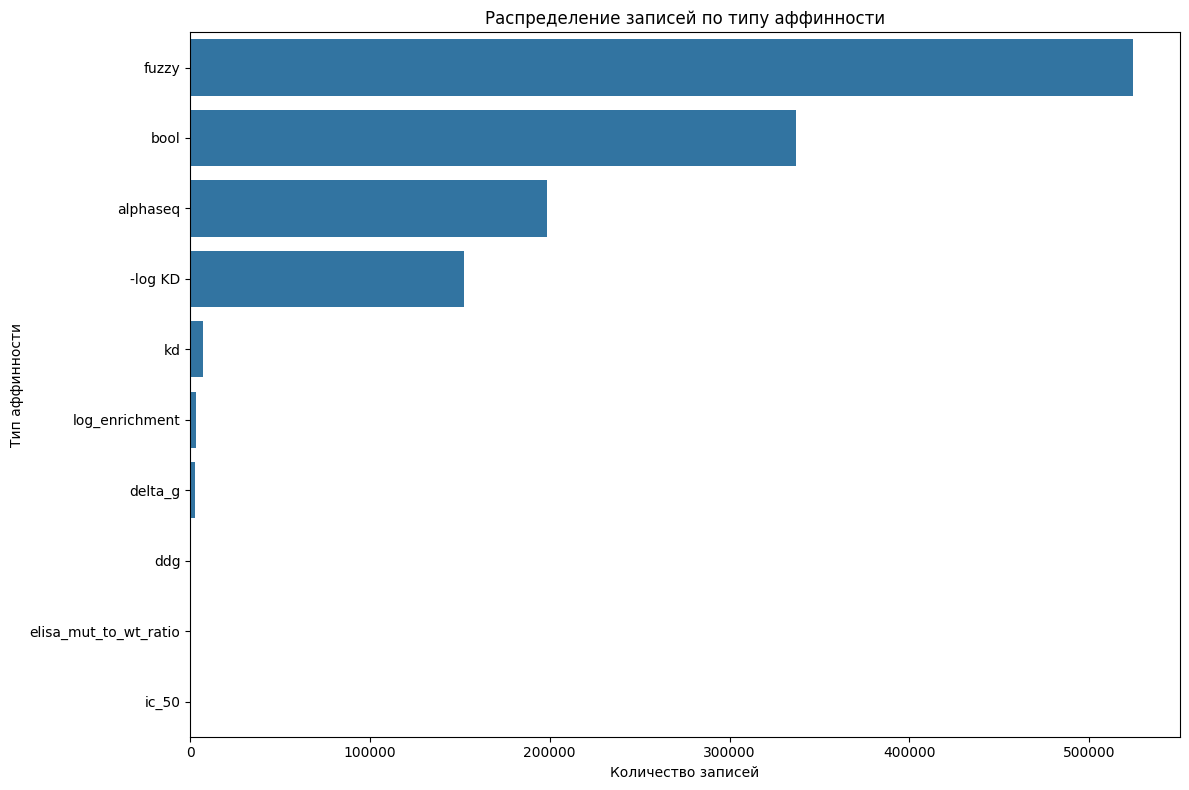

In [ ]:
# Get the value counts for the 'affinity_type' column
affinity_type_counts = agab_df['affinity_type'].value_counts().reset_index()
affinity_type_counts.columns = ['affinity_type', 'count']

# Create a bar plot
plt.figure(figsize=(12, 8)) # Adjusted figure size for horizontal plot
sns.barplot(x='count', y='affinity_type', data=affinity_type_counts) # Swapped x and y
# plt.xticks(rotation=90) # No longer needed for y-axis labels
plt.xlabel("Количество записей") # Swapped labels
plt.ylabel("Тип аффинности") # Swapped labels
plt.title("Распределение записей по типу аффинности")
plt.tight_layout()
plt.show()

В affinity могут быть значения 'l', 'h', 'm'

In [ ]:
# Get 20 random values from the 'affinity' column
random_affinity_values = agab_df['affinity'].sample(20)

# Display the random values
print("20 случайных значений в колонке 'affinity':")
print(random_affinity_values)

20 случайных значений в колонке 'affinity':
215876      2.004249228159626
639492                      m
765969     3.4055081483220206
34481       4.895504011796806
653492      8.963752128963558
1154076                   1.0
913480                    1.0
759618                      h
919043                    1.0
1026829                   1.0
1001269                     h
18800                       l
199659                      h
485112                    0.0
203672                      l
210967                      l
743928                      l
959912       9.37492186316319
802188                      m
685370                      h
Name: affinity, dtype: object


In [ ]:
# Подсчёт числа строк по каждому датасету
dataset_counts = agab_df['dataset'].value_counts()

print("Affinity Types and Sample Affinity Values by Dataset (sorted by number of rows):")
for dataset, count in dataset_counts.items():
    print(f"\n--- Dataset: {dataset} ({count} rows) ---")

    # Фильтруем строки для текущего датасета
    dataset_df = agab_df[agab_df['dataset'] == dataset]

    # Уникальные типы аффинности
    affinity_types = dataset_df['affinity_type'].unique()
    print(f"  Affinity Types: {', '.join(affinity_types)}")

    # 5 случайных значений аффинности (если есть)
    sample_affinity = dataset_df['affinity'].dropna().sample(
        min(5, len(dataset_df['affinity'].dropna())), random_state=42
    )
    print("  Sample Affinity Values:")
    for affinity_value in sample_affinity:
        print(f"    - {affinity_value}")


Affinity Types and Sample Affinity Values by Dataset (sorted by number of rows):

--- Dataset: buzz (524346 rows) ---
  Affinity Types: fuzzy
  Sample Affinity Values:
    - m
    - h
    - h
    - m
    - m

--- Dataset: patents (217463 rows) ---
  Affinity Types: bool
  Sample Affinity Values:
    - 1.0
    - 1.0
    - 1.0
    - 1.0
    - 1.0

--- Dataset: alphaseq (198703 rows) ---
  Affinity Types: alphaseq
  Sample Affinity Values:
    - 1.483750823336532
    - 2.15101556394394
    - 4.41968551133634
    - 1.0280332526157243
    - 4.503923533487438

--- Dataset: abbd (155853 rows) ---
  Affinity Types: log_enrichment, -log KD
  Sample Affinity Values:
    - 6.0
    - 9.468269473680197
    - 6.0
    - 6.0
    - 9.316993479150554

--- Dataset: covid-19 (54625 rows) ---
  Affinity Types: bool
  Sample Affinity Values:
    - 0.0
    - 1.0
    - 1.0
    - 1.0
    - 0.0

--- Dataset: hiv (48008 rows) ---
  Affinity Types: bool
  Sample Affinity Values:
    - 1.0
    - 1.0
    - 0.0
    

#### antigen_sequence

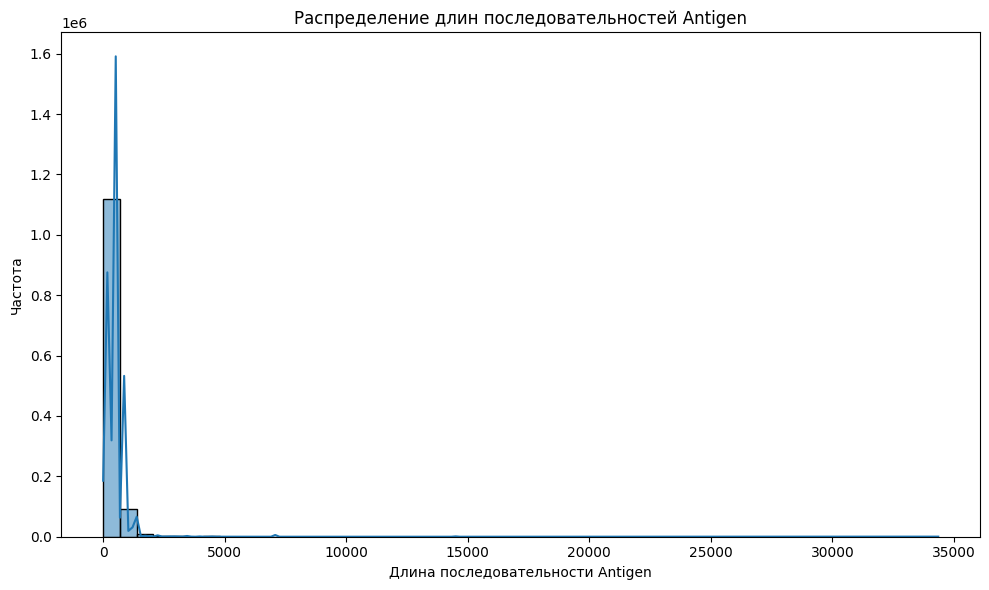

In [ ]:
# Calculate the length of antigen_sequence
antigen_sequence_lengths = agab_df['antigen_sequence'].apply(len)

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(antigen_sequence_lengths, bins=50, kde=True)
plt.xlabel("Длина последовательности Antigen")
plt.ylabel("Частота")
plt.title("Распределение длин последовательностей Antigen")
plt.tight_layout()
plt.show()

#### confidence

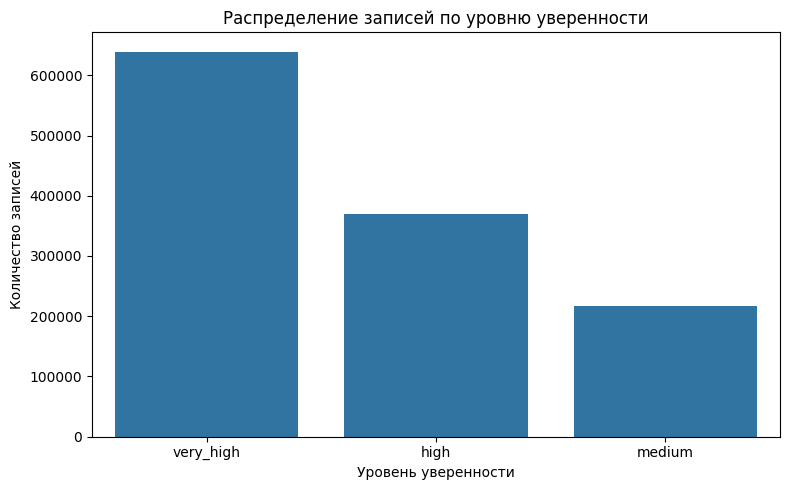

In [ ]:
# Get the value counts for the 'confidence' column
confidence_counts = agab_df['confidence'].value_counts().reset_index()
confidence_counts.columns = ['confidence', 'count']

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='confidence', y='count', data=confidence_counts)
plt.xlabel("Уровень уверенности")
plt.ylabel("Количество записей")
plt.title("Распределение записей по уровню уверенности")
plt.tight_layout()
plt.show()

#### nanobody

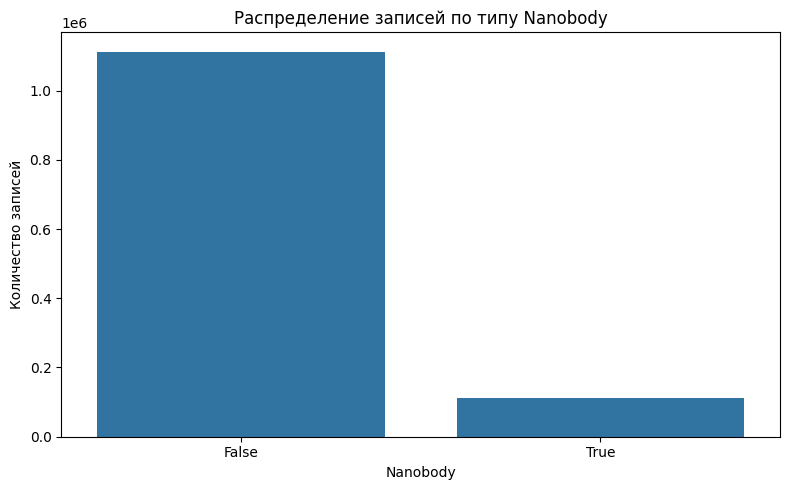

In [ ]:
# Get the value counts for the 'nanobody' column
nanobody_counts = agab_df['nanobody'].value_counts().reset_index()
nanobody_counts.columns = ['nanobody', 'count']

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='nanobody', y='count', data=nanobody_counts)
plt.xlabel("Nanobody")
plt.ylabel("Количество записей")
plt.title("Распределение записей по Nanobody")
plt.xticks([0, 1], ['False', 'True']) # Label x-axis as False and True
plt.tight_layout()
plt.show()

#### metadata

In [ ]:
agab_df.['me']

Метадата

target_name — читаемое имя антигена,

target_pdb — идентификатор(ы) структуры антигена в PDB,

target_uniprot — UniProt ID/AC белка-мишени,

source_url — ссылка на первичный источник записи/набора,

heavy_riot_numbering и

light_riot_numbering — стандартизованная схема нумерации остатков тяжёлой и лёгкой цепей по RIOT (аналогично IMGT/ANARCI), фиксирующая позиции CDR/FR и вставки.

sequence_alignment_aa — !!!

In [ ]:
agab_df['metadata'].sample(5)

#### process measurement

In [3]:
# Исследование колонки processed_measurement
print("=" * 80)
print("ИССЛЕДОВАНИЕ КОЛОНКИ processed_measurement")
print("=" * 80)

# Базовая информация
print(f"\n1. Общая информация:")
print(f"   - Всего записей: {len(agab_df):,}")
print(f"   - Непустых значений: {agab_df['processed_measurement'].notna().sum():,}")
print(f"   - Пустых значений: {agab_df['processed_measurement'].isna().sum():,}")
print(f"   - Уникальных значений: {agab_df['processed_measurement'].nunique():,}")

# Тип данных
print(f"\n2. Тип данных: {agab_df['processed_measurement'].dtype}")

# Примеры значений
print(f"\n3. Примеры значений (первые 20):")
sample_values = agab_df['processed_measurement'].sample(20, random_state=42)
for idx, val in enumerate(sample_values, 1):
    print(f"   {idx:2d}. {val}")

# Попытка определить, числовые ли это данные
print(f"\n4. Анализ типов значений:")
try:
    # Пробуем преобразовать в числовой формат
    numeric_values = pd.to_numeric(agab_df['processed_measurement'], errors='coerce')
    non_numeric_count = numeric_values.isna().sum()
    numeric_count = numeric_values.notna().sum()
    
    print(f"   - Можно преобразовать в число: {numeric_count:,} ({numeric_count/len(agab_df)*100:.2f}%)")
    print(f"   - Не числовые значения: {non_numeric_count:,} ({non_numeric_count/len(agab_df)*100:.2f}%)")
    
    if numeric_count > 0:
        print(f"\n   Статистика для числовых значений:")
        print(f"   - Минимум: {numeric_values.min()}")
        print(f"   - Максимум: {numeric_values.max()}")
        print(f"   - Среднее: {numeric_values.mean():.4f}")
        print(f"   - Медиана: {numeric_values.median():.4f}")
        print(f"   - Стандартное отклонение: {numeric_values.std():.4f}")
except Exception as e:
    print(f"   Ошибка при анализе: {e}")

# Уникальные значения (если их немного)
unique_count = agab_df['processed_measurement'].nunique()
if unique_count <= 50:
    print(f"\n5. Все уникальные значения ({unique_count}):")
    unique_values = agab_df['processed_measurement'].value_counts()
    for val, count in unique_values.items():
        print(f"   '{val}': {count:,} ({count/len(agab_df)*100:.2f}%)")
else:
    print(f"\n5. Топ-20 наиболее частых значений:")
    top_values = agab_df['processed_measurement'].value_counts().head(20)
    for val, count in top_values.items():
        print(f"   '{val}': {count:,} ({count/len(agab_df)*100:.2f}%)")

# Распределение по датасетам
print(f"\n6. Распределение processed_measurement по датасетам:")
measurement_by_dataset = agab_df.groupby('dataset')['processed_measurement'].agg([
    ('count', 'count'),
    ('nunique', 'nunique'),
    ('top_value', lambda x: x.value_counts().index[0] if len(x) > 0 else None),
    ('top_count', lambda x: x.value_counts().iloc[0] if len(x) > 0 else 0)
]).sort_values('count', ascending=False)
print(measurement_by_dataset.head(15))

print("\n" + "=" * 80)

ИССЛЕДОВАНИЕ КОЛОНКИ processed_measurement

1. Общая информация:
   - Всего записей: 1,227,083
   - Непустых значений: 1,227,083
   - Пустых значений: 0
   - Уникальных значений: 243,496

2. Тип данных: object

3. Примеры значений (первые 20):
    1. 1.0
    2. 1.0
    3. 1.0
    4. l
    5. 1.0
    6. h
    7. 1.0
    8. 7.2807503237938525
    9. 1.0
   10. 1.305176285750708
   11. 1.4469865378459872
   12. 1.0
   13. l
   14. 0.0
   15. m
   16. 0.0
   17. 1.0
   18. 1.0
   19. l
   20. 8.420127253255396

4. Анализ типов значений:
   - Можно преобразовать в число: 694,447 (56.59%)
   - Не числовые значения: 532,636 (43.41%)

   Статистика для числовых значений:
   - Минимум: -17.0
   - Максимум: 1461.56
   - Среднее: 2.8150
   - Медиана: 1.0000
   - Стандартное отклонение: 5.5210

5. Топ-20 наиболее частых значений:
   '1.0': 283,056 (23.07%)
   'm': 190,011 (15.48%)
   'h': 172,149 (14.03%)
   'l': 162,186 (13.22%)
   '0.0': 52,111 (4.25%)
   'nan': 8,279 (0.67%)
   '6.5': 3,350 (0.

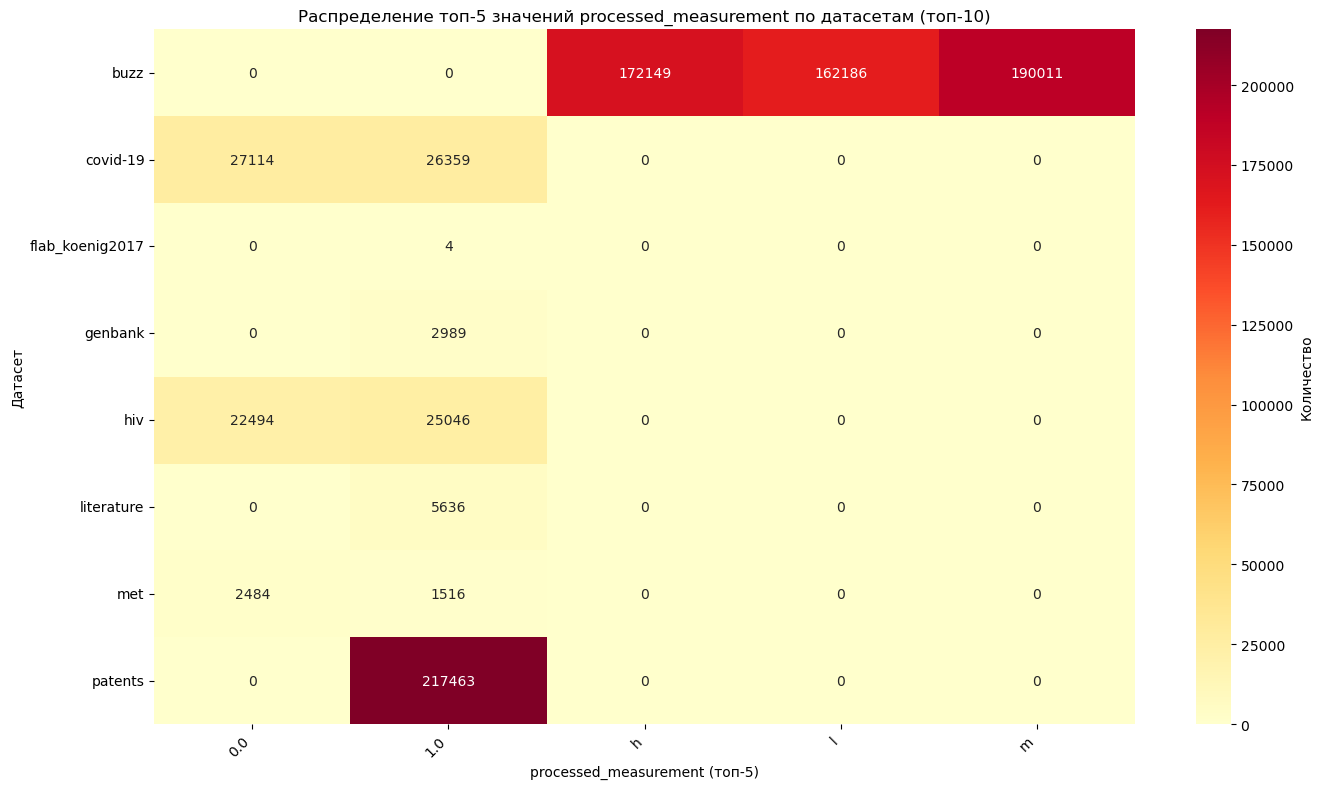

In [5]:

# 3. Распределение по датасетам (топ-10 датасетов)
top_datasets = agab_df['dataset'].value_counts().head(10).index
filtered_df = agab_df[agab_df['dataset'].isin(top_datasets)]

# Если уникальных значений processed_measurement не слишком много
if filtered_df['processed_measurement'].nunique() <= 20:
    plt.figure(figsize=(14, 8))
    measurement_dataset_cross = pd.crosstab(
        filtered_df['dataset'], 
        filtered_df['processed_measurement']
    )
    sns.heatmap(measurement_dataset_cross, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Количество'})
    plt.xlabel("processed_measurement")
    plt.ylabel("Датасет")
    plt.title("Распределение processed_measurement по датасетам (топ-10)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    # Показываем только топ-5 значений processed_measurement
    top_measurements = filtered_df['processed_measurement'].value_counts().head(5).index
    filtered_df_top = filtered_df[filtered_df['processed_measurement'].isin(top_measurements)]
    
    plt.figure(figsize=(14, 8))
    measurement_dataset_cross = pd.crosstab(
        filtered_df_top['dataset'], 
        filtered_df_top['processed_measurement']
    )
    sns.heatmap(measurement_dataset_cross, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Количество'})
    plt.xlabel("processed_measurement (топ-5)")
    plt.ylabel("Датасет")
    plt.title("Распределение топ-5 значений processed_measurement по датасетам (топ-10)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Прочие датасеты

In [ ]:
splits = {'train': 'train.csv', 'validation': 'valid.csv'}
vhh_df = pd.read_csv("hf://datasets/COGNANO/VHHCorpus-2M/" + splits["train"])
vhh_df.head()

,VHH_sequence
0,MKYLLPTAAAALLLLAAQPAMAQAQLQESGGGLVQPGGSLRLPCAA...
1,MKYLLPTAAAALLLLAAQPAMAQVQLQESGGGKVQTGGSLRLSCAA...
2,MKYLLPTAAAALLLLAAQPAMAQVQLQESGGGLAQAGGSLRLSCAA...
3,MKYLLPTAAAALLLLAAQPAMAQVQLQESGGGLAQAGGSLRLSCAA...
4,MKYLLPTAAAALLLLAAQPAMAQVQLQESGGGLAQAGGSLRLSCVG...


In [ ]:
splits = {'train': 'train.csv', 'test': 'test.csv'}
covid_df = pd.read_csv("hf://datasets/COGNANO/AVIDa-SARS-CoV-2/" + splits["train"])
covid_df.head()

,VHH_sequence,Ag_label,label,subject_species,subject_name,subject_sex
0,MKYLLPTAAAGLLLLAAQPAMAQVQLQESGGGAVQPGGSLRLSCAA...,Alpha+E484K_cell,1,alpaca,puta,male
1,MKYLLPTAAAGLLLLAAQPAMAQVQLQESGGGLVQPGGSLRLSCAA...,Alpha+E484K_cell,0,alpaca,puta,male
2,MKYLLPTAAAGLLLLAAQPAMAQVQLQESGGGLVQPGGSLRLSCAA...,Alpha+E484K_cell,1,alpaca,puta,male
3,MKYLLPTAAAGLLLLAAQPAMAQVQLQESGGGLVQAGGSLRVSCAA...,Alpha+E484K_cell,0,alpaca,puta,male
4,MKYLLPTAAAGLLLLAAQPAMAQVQLQESGGGLVQPGGSLRLSCVA...,Alpha+E484K_cell,1,alpaca,puta,male


In [ ]:
# Login using e.g. `huggingface-cli login` to access this dataset
TNF_df = pd.read_csv("hf://datasets/COGNANO/AVIDa-hTNFa/AVIDa-hTNFa.csv")
TNF_df.head()

,VHH_sequence,Ag_label,label,subject_species,subject_name,subject_sex
0,MKYLLPTAAAGLLLLAAQPAMAQVQLQESGGGLVQPGGSLRLSCKA...,TNFa-WT-beads,1,alpaca,happy,male
1,MKYLLPTAAAGLLLLAAQPAMAQVQLQESGGGLVQPGGSLRLSCKA...,TNFa-WT-beads,1,alpaca,happy,male
2,MKYLLPTAAAGLLLLAAQPAMAQVQLQESGGGLVQPGGSLRPSCKA...,TNFa-WT-beads,1,alpaca,happy,male
3,MKYLLPTAAAGLLLLAAQPAMAQVQLQESGGGLVQPGGSLGLSCKA...,TNFa-WT-beads,1,alpaca,happy,male
4,MKYLLPTAAAGLLLLAAQPAMAQVQLQESGGGLVQPGGSLRLSCKA...,TNFa-WT-beads,0,alpaca,happy,male


# mmseqs2

In [ ]:
# Сохраняем последовательности
for col in ['heavy_sequence', 'light_sequence', 'antigen_sequence']:
    with open(f"{col}.fasta", "w") as f:
        for i, seq in enumerate(agab_df[col]):
            f.write(f">seq{i}\n{seq}\n")


In [ ]:
!mmseqs createdb heavy_sequence.fasta heavy_sequenceDB
!mmseqs cluster heavy_sequenceDB clusters tmp --min-seq-id 0.95 -c 0.8
!mmseqs createtsv heavy_sequenceDB heavy_sequenceDB clusters heavy_sequence_clusters.tsv

In [ ]:
import subprocess

results = []

def process_sequences(fasta_path, name):
    print(f"\n🔥 Обработка: {name}")

    # Подсчет строк
    with open(fasta_path) as f:
        total = sum(1 for line in f if line.startswith(">"))

    # Загружаем в pandas, чтобы удалить точные дубликаты
    seqs = []
    with open(fasta_path) as f:
        current = ""
        for line in f:
            if line.startswith(">"):
                if current:
                    seqs.append(current)
                current = ""
            else:
                current += line.strip()
        if current:
            seqs.append(current)

    df = pd.DataFrame({"seq": seqs})
    unique_df = df.drop_duplicates(subset=["seq"])
    unique_count = len(unique_df)

    print(f"Всего: {total}, Уникальных: {unique_count}")

    # Сохранить уникальные
    unique_fasta = f"{name}_unique.fasta"
    with open(unique_fasta, "w") as f:
        for i, seq in enumerate(unique_df["seq"]):
            f.write(f">seq{i}\n{seq}\n")

    # MMseqs2
    subprocess.call(f"mmseqs createdb {unique_fasta} {name}_db", shell=True)
    subprocess.call(f"mmseqs cluster {name}_db {name}_clu tmp --min-seq-id 0.95 -c 0.8", shell=True)
    subprocess.call(f"mmseqs createtsv {name}_db {name}_db {name}_clu {name}_result.tsv", shell=True)

    # Число кластеров (смотрим representatives)
    tsv = pd.read_csv(f"{name}_result.tsv", sep="\t", header=None)
    cluster_count = len(tsv[0].unique())

    results.append({
        "type": name,
        "total": total,
        "unique": unique_count,
        "clusters_95id": cluster_count,
        "reduction_unique": round((1 - unique_count/total) * 100, 2),
        "reduction_clusters": round((1 - cluster_count/total) * 100, 2)
    })

for col in ['heavy_sequence', 'light_sequence', 'antigen_sequence']:
    fasta = f"{col}.fasta"
    process_sequences(fasta, col)

result_df = pd.DataFrame(results)
result_df



🔥 Обработка: heavy_sequence
Всего: 1227083, Уникальных: 855217
